In [203]:
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
import os,zipfile,cv2
file = zipfile.ZipFile('/content/drive/MyDrive/self-built-masked-face-recognition-dataset.zip')
file.extractall('.')

In [174]:
data= []
label = []

In [175]:
k = 0
for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset'):
        image_path = ('/content/self-built-masked-face-recognition-dataset/AFDB_face_dataset')+'/'+i
        for j in os.listdir(image_path):
          if k<4000:
            image = cv2.imread(image_path+'/'+j)
            data.append(cv2.resize(image,(100,100)))
            label.append(0)
          k+=1



In [176]:
k = 0
for i in os.listdir('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset'):
        image_path = ('/content/self-built-masked-face-recognition-dataset/AFDB_masked_face_dataset')+'/'+i
        for j in os.listdir(image_path):
          if k<4000:
            image = cv2.imread(image_path+'/'+j)
            data.append(cv2.resize(image,(100,100)))
            label.append(1)
          k+=1


In [177]:
data = np.array(data).reshape(-1,100*100*3)
label = np.array(label).reshape(-1,1)

In [178]:
data.shape

(6203, 30000)

In [179]:
label.shape

(6203, 1)

In [180]:
X=pd.DataFrame(data)

In [181]:
Y = pd.DataFrame(label)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.5,random_state=42)

In [184]:
X_train.shape

(3101, 30000)

In [185]:
X_test.shape

(3102, 30000)

In [186]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)

Decision tree classifier

In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [188]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train1,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [189]:
X_train.shape[1]

30000

In [190]:
X_test.shape[1]

30000

In [191]:
y_pred2 = clf2.predict(X_test1)

In [192]:
accuracy_decision_tree=metrics.accuracy_score(Y_test,y_pred2)
print(accuracy_decision_tree)

0.8961960025789814


In [193]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [194]:
y_pred4 = gnb.predict(X_test)

In [195]:
accuracy_naive_gaussian=metrics.accuracy_score(Y_test,y_pred4)
print(accuracy_naive_gaussian)

0.8546099290780141


In [196]:
from sklearn.linear_model import Perceptron

In [197]:
per = Perceptron(tol=1e-3, random_state=0)
per.fit(X_train,Y_train.values.ravel())

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [198]:
Y_pred2  = per.predict(X_test)
accuracy_perceptron=metrics.accuracy_score(Y_test,Y_pred2)
print(accuracy_perceptron)

0.9532559638942618


In [199]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,Y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [200]:
Y_pred = model.predict(X_test)


In [201]:
accuracy_svm=metrics.accuracy_score(Y_test,Y_pred)
print(accuracy_svm)

0.9732430689877498


In [ ]:
from sklearn.metrics import log_loss

In [206]:
#decision tree
metrics.log_loss(Y_test,y_pred2)

3.585301721075362

In [207]:
#naive bayes
metrics.log_loss(Y_test,y_pred4)

5.021655982945921

In [208]:
#perceptron
metrics.log_loss(Y_test,Y_pred2)

1.61449547257442

In [209]:
#svm
metrics.log_loss(Y_test,Y_pred)

0.9241562970765095

In [ ]:
from sklearn.metrics import f1_score

In [211]:
#decision tree
metrics.f1_score(Y_test,y_pred2)

0.8520220588235293

In [212]:
#naive bayes
metrics.f1_score(Y_test,y_pred4)

0.7967552951780081

In [213]:
#perceptron
metrics.f1_score(Y_test,Y_pred2)

0.9328392774432608

In [214]:
#svm
metrics.f1_score(Y_test,Y_pred)

0.9614132961413296

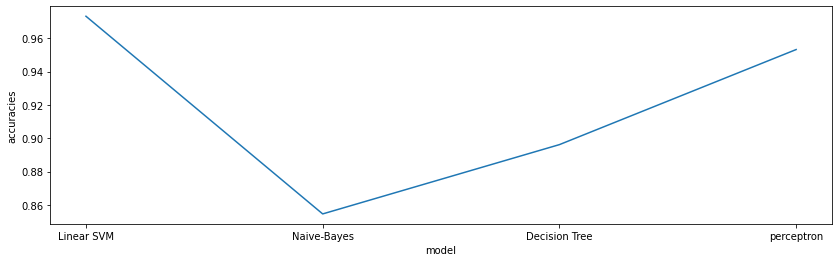

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
data = {
  "model" : ['Linear SVM','Naive-Bayes','Decision Tree','perceptron'] ,
  "accuracies": [accuracy_svm,accuracy_naive_gaussian,accuracy_decision_tree,accuracy_perceptron]
}
df=pd.DataFrame(data)
plt.figure(figsize=(14,4))
sns.lineplot(data=df, x="model", y="accuracies")
plt.show()